# Exploración de distintos modelos de regresión múltiple para predecir el precio de la vivienda


En este notebook utilizarás datos sobre ventas de viviendas en el condado de King para predecir los precios mediante regresión múltiple. La primera tarea consistirá en explorar la regresión múltiple, en particular el impacto de añadir características a una regresión y medir el error. En la segunda tarea implementarás un algoritmo de descenso del gradiente. En esta tarea haras:

* Realizarr un poco de feature engineering  (ingeniería de características).
* Utilizar las funciones integradas de **scikit-learn** para calcular los pesos de regresión (coeficientes).
* Dados los pesos de regresión, los predictores y el resultado, escribir una función para calcular la suma del cuadrado de los resíduos (RSS).
* Observar los coeficientes e interpretar su significado
* Evaluar múltiples modelos mediante RSS


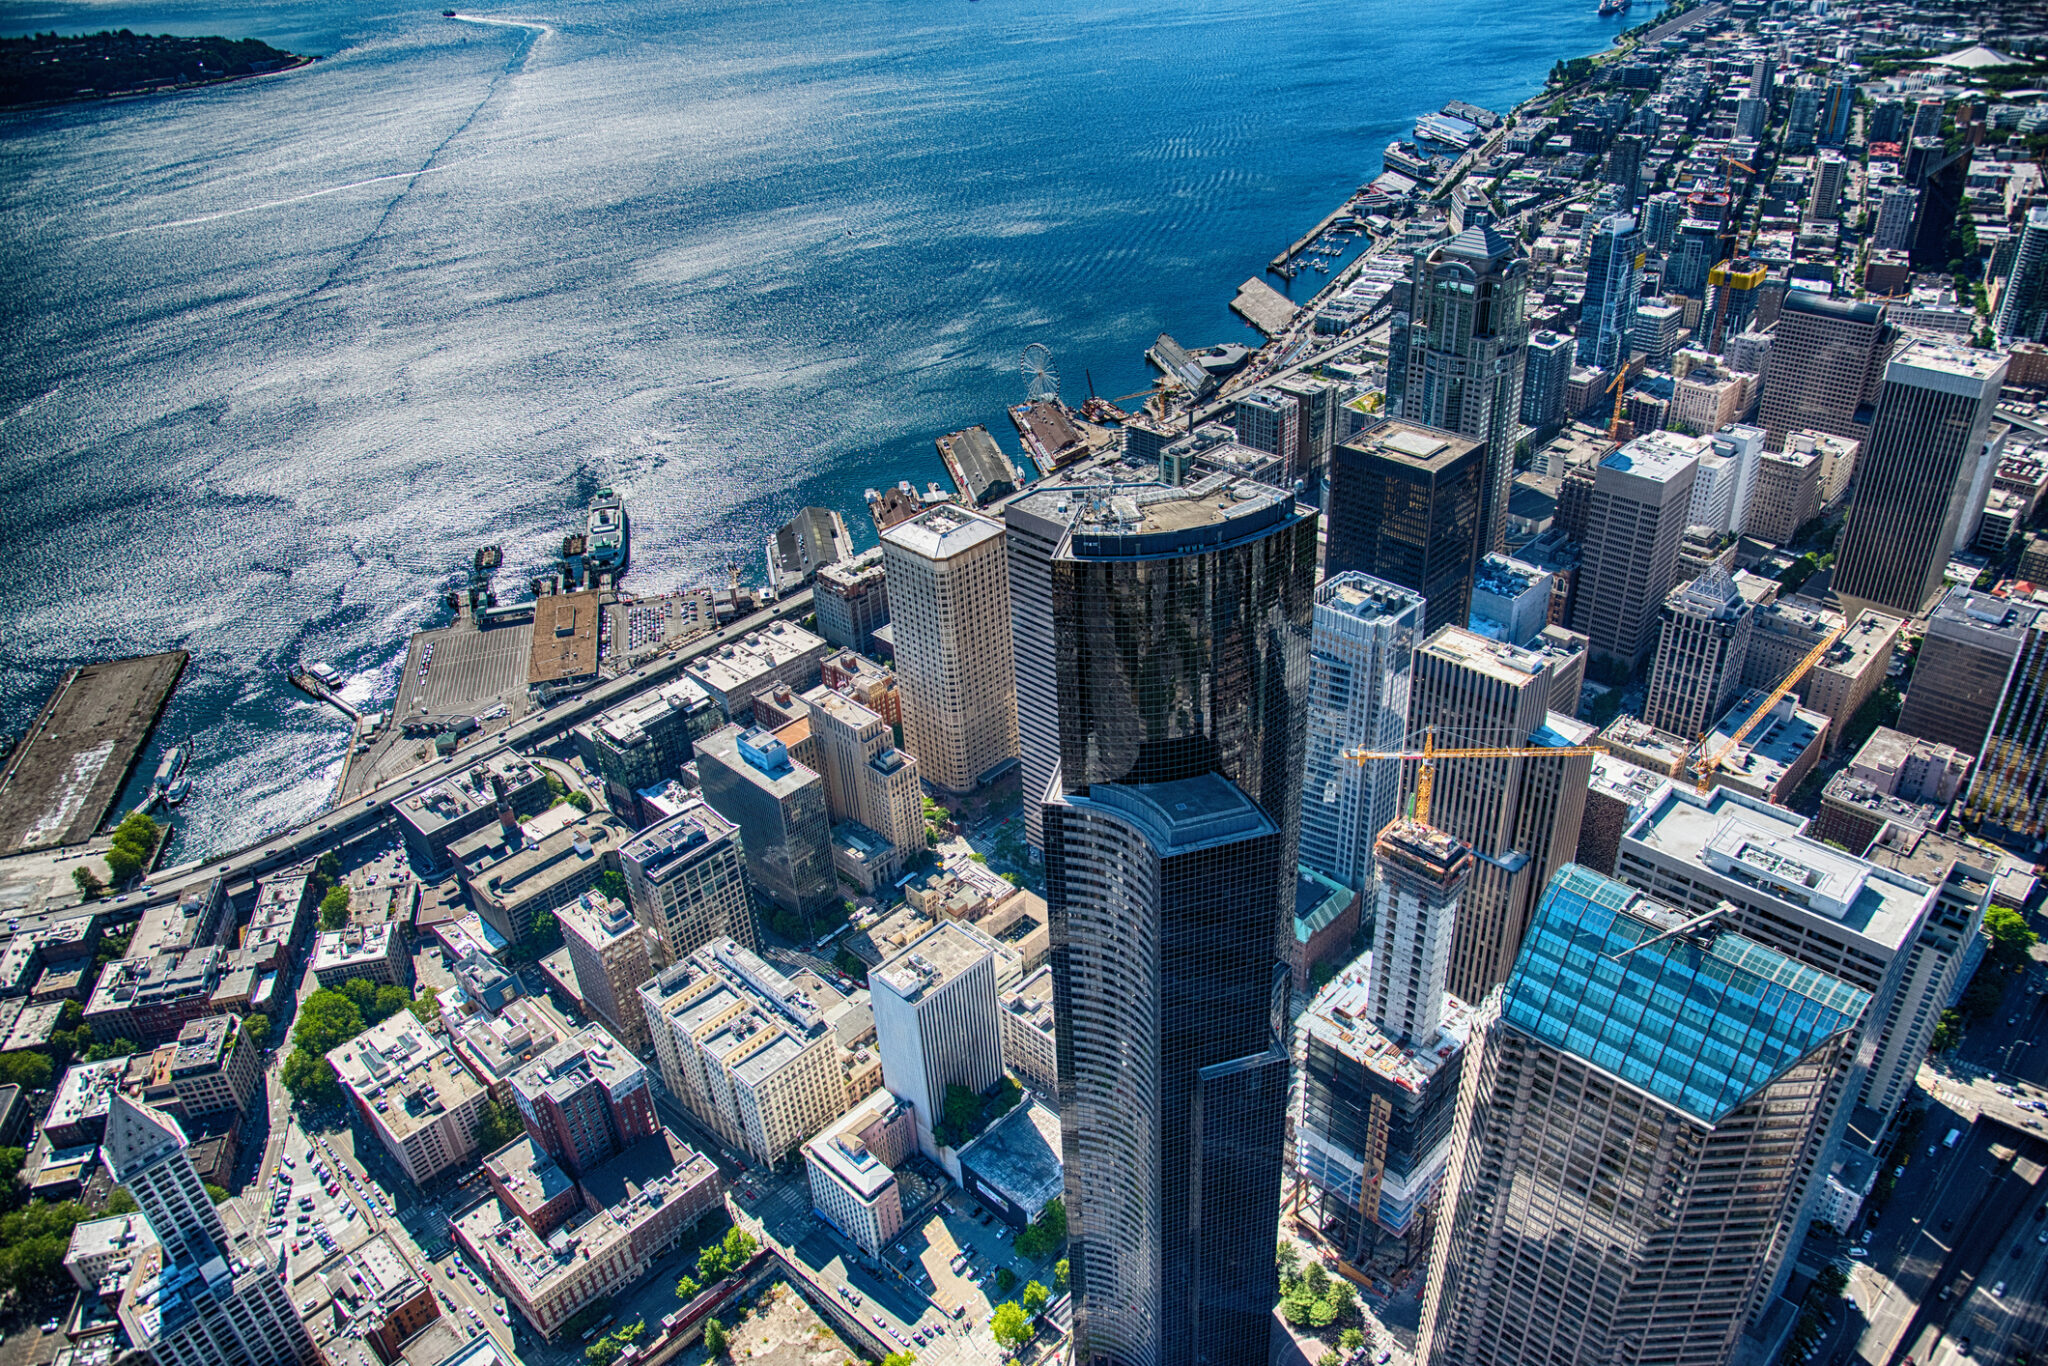

## Importamos las librerías necesarias.

In [12]:
#importamos librerías

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error






## Cargamos los datos de entrenamiento y test.

In [25]:
dtype_dict = {'bathrooms':float,'waterfront':int, 
              'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 
              'price':float,'bedrooms':float, 
              'zipcode':str, 'long':float, 
              'sqft_lot15':float,'sqft_living':float, 
              'floors':str, 'condition':int, 
              'lat':float, 'date':str, 
              'sqft_basement':int, 'yr_built':int, 
              'id':str, 'sqft_lot':int, 'view':int}

In [14]:
df_train = pd.read_csv('datasets/kc_house_train_data.csv', dtype=dtype_dict)
df_test = pd.read_csv('datasets/kc_house_test_data.csv', dtype=dtype_dict)

df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [15]:
#Comprobamos que los tipos de datos se han convertido correctamente
df_train.dtypes

id                object
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot           int32
floors            object
waterfront         int32
view               int32
condition          int32
grade              int32
sqft_above         int32
sqft_basement      int32
yr_built           int32
yr_renovated       int32
zipcode           object
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

## Aprendizaje de un modelo de regresión múltiple

Vamos a utilizar el siguiente código para aprender un modelo de regresión múltiple que prediga el *precio* basándonos en las siguientes características:
*example_features = ['sqft_living', 'bedrooms', 'bathrooms']* en los datos de entrenamiento con el siguiente código:


In [16]:
caracteristicas = ['sqft_living', 'bedrooms', 'bathrooms']

X_train = df_train[caracteristicas]
y_train = df_train['price']

#Creamos un modelo de regresion.
model = LinearRegression()

#Entrenamos el modelo con el df de entrenamiento
model.fit(X_train, y_train)

#Extraemos los coeficientes del modelo
print(model.coef_) #Coeficientes de cada variable
print(model.intercept_) # coeficiente intercepción

[   315.40669062 -65081.88711588   6942.16598637]
87912.86581496417


In [17]:
print(model.intercept_)


87912.86581496417


## Haciendo predicciones

Cabe recordar que, una vez construido el modelo, podemos utilizar la función .predict() para encontrar los valores predichos para los datos que le pasemos. Por ejemplo, utilizando el modelo de ejemplo anterior:

In [18]:
df_pred = model.predict(X_train)
#debería de ser 271789.2653799698
df_pred[0]

271789.26537996973

## Computar RSS - EJ1

Ahora que podemos hacer predicciones dado el modelo, vamos a escribir una función para calcular el RSS del modelo. Completa la siguiente función para calcular el RSS dado el modelo, los datos y la predicción.

In [26]:
def get_residual_sum_of_squares(model, data, outcome):
    # Primero cogemos las predicciones
    df_pred = model.predict(data)
    # Entonces computamos los errores/residuos
    residuos = df_pred - outcome
    # Entonces calculamos el cuadrado y lo sumamos
    RSS = (residuos**2).sum()
    return(RSS)    

Prueba la función calculando el RSS en los datos de test para el modelo del ejemplo anterior

In [27]:
rss_example_train = get_residual_sum_of_squares(model, df_test[caracteristicas], df_test['price'])
rss_example_train

273761940583133.75

In [22]:
df_test.drop('price', axis=1)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0114101516,20140528T000000,3.0,1.00,1430.0,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780.0,12697.0
1,9297300055,20150124T000000,4.0,3.00,2950.0,5000,2,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140.0,4000.0
2,1202000200,20141103T000000,3.0,2.00,1710.0,4697,1.5,0,0,5,6,1710,0,1941,0,98002,47.3048,-122.218,1030.0,4705.0
3,8562750320,20141110T000000,3.0,2.50,2320.0,3980,2,0,0,3,8,2320,0,2003,0,98027,47.5391,-122.070,2580.0,3980.0
4,7589200193,20141110T000000,3.0,1.00,1090.0,3000,1.5,0,0,4,8,1090,0,1929,0,98117,47.6889,-122.375,1570.0,5080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,8672200110,20150317T000000,5.0,3.75,4170.0,8142,2,0,2,3,10,4170,0,2006,0,98056,47.5354,-122.181,3030.0,7980.0
4225,5087900040,20141017T000000,4.0,2.75,2500.0,5995,2,0,0,3,8,2500,0,2008,0,98042,47.3749,-122.107,2530.0,5988.0
4226,3448900210,20141014T000000,4.0,2.50,2520.0,6023,2,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520.0,6023.0
4227,6600060120,20150223T000000,4.0,2.50,2310.0,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0


## Crea nuevas variables -  EJ2

Aunque a menudo pensamos en la regresión múltiple como la inclusión de varias variables diferentes (por ejemplo, el número de dormitorios, los metros cuadrados y el número de cuartos de baño), también podemos considerar transformaciones de las características existentes, por ejemplo, el logaritmo de los metros cuadrados o incluso características de "interacción" como el producto de dormitorios y cuartos de baño.

Añada 4 nuevas variables a los datos de entrenamiento y a los datos de prueba. 

```
bedrooms_squared = bedrooms*bedrooms
bed_bath_rooms = bedrooms*bathrooms
log_sqft_living = log(sqft_living)
lat_plus_long = lat + long
```



In [30]:
#Importamos numpy para crear el logaritmo con np.log
import numpy as np

#Creamos bedrooms_squared
df_train['bedrooms_squared'] = df_train['bedrooms'].pow(2)
df_test['bedrooms_squared'] = df_test['bedrooms'].pow(2)

#Crea las 3 características restantes en AMBOS datasets (train and test)
#Creamos bed_bath_rooms
df_train['bed_bath_rooms'] = df_train['bedrooms']*df_train['bathrooms']
df_test['bed_bath_rooms'] = df_test['bedrooms']*df_test['bathrooms']

#Creamos log_sqft_living
df_train['log_sqft_living'] = np.log(df_train['sqft_living'])
df_test['log_sqft_living'] = np.log(df_test['sqft_living'])

#Creamos lat_plus_long
df_train['lat_plus_long'] = df_train['lat']+df_train['long']
df_test['lat_plus_long'] = df_test['lat']+df_test['long']

Antes de continuar vamos a explicar estas nuevas variables:



*   Elevar al cuadrado los dormitorios aumentará la separación entre no muchos dormitorios (por ejemplo, 1) y muchos dormitorios (por ejemplo, 4) ya que 1^2 = 1 pero 4^2 = 16. En consecuencia, esta variable afectará sobre todo a las casas con muchos dormitorios.

*   Dormitorios * baños es lo que se llama una variable de "interacción". Es grande cuando ambas son grandes.

*   Coger el logaritmo de sqft tiene el efecto de acercar los valores grandes y dispersar los pequeños.

*   Sumar la latitud a la longitud no tiene sentido, pero lo haremos de todas formas (ya verás por qué)

## PREGUNTAS

¿Cuáles son los valores medios (media aritmética) de tus 4 nuevas variables en los datos **df_test**? (redondea a 2 dígitos)

In [33]:
# media de la columna bedrooms_squared
mean_bedrooms_squared = round(df_test['bedrooms_squared'].mean(), 2)

# media de la columna bed_bath_rooms
mean_bed_bath_rooms = round(df_test['bed_bath_rooms'].mean(), 2)

# media de la columna log_sqft_living
mean_log_sqft_living = round(df_test['log_sqft_living'].mean(), 2)

# media de la columna lat_plus_long
mean_lat_plus_long = round(df_test['lat_plus_long'].mean(), 2)

print(mean_bedrooms_squared, mean_bed_bath_rooms, mean_log_sqft_living, mean_lat_plus_long)

12.45 7.5 7.55 -74.65


## Aprendizaje de varios modelos

Ahora aprenderemos los pesos de tres modelos (anidados) para predecir el precio de la vivienda. El primer modelo tendrá el menor número de características, el segundo modelo añadirá una característica más y el tercero añadirá algunas más:

* Modelo 1: **sqft**, **bedrooms**, **bathrooms**, **lat** y **long**.
* Modelo 2: modelo1 + **bed_bath_rooms**
* Modelo 3: modelo2 + **bedrooms_squared** + **log_sqft_living** + **lat_plus_long**

In [45]:
modelo1 = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
modelo2 = modelo1  + ['bed_bath_rooms']
modelo3 = modelo2 + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

#Datos M1
def linear_reg_price(caracteristics):
    X_train = df_train[caracteristics]
    y_train = df_train['price']
    #Creamos un modelo de regresion.
    model = LinearRegression()

    #Entrenamos el modelo con el df de entrenamiento
    model.fit(X_train, y_train)

    #Extraemos los coeficientes del modelo
    intercept = model.intercept_
    coef = model.coef_
    return intercept, coef

In [46]:
linear_reg_price(modelo1)
linear_reg_price(modelo2)
linear_reg_price(modelo3)

(-62036084.98609836,
 array([ 5.29422820e+02,  3.45142296e+04,  6.70607813e+04,  5.34085611e+05,
        -4.06750711e+05, -8.57050439e+03, -6.78858667e+03, -5.61831484e+05,
         1.27334900e+05]))

6. ¿Cuál es el signo (**positivo o negativo**) del coeficiente/ponderación de "bathrooms" en el modelo 1?

7. ¿Cuál es el signo (**positivo o negativo**) del coeficiente/ponderación de "bathrooms" en el modelo 2?

8. ¿Es el signo del coeficiente el mismo en ambos modelos? Piensa por qué puede ser así.



In [47]:
intercept_1, coef_1 = linear_reg_price(modelo1)
# Coeficiente de bathrooms del modelo 1
print(coef_1[2])

15706.742082734634


In [48]:
intercept_2, coef_2 = linear_reg_price(modelo2)
# Coeficiente de bathrooms de modelo 2
print(coef_2[2])

-71461.30829275967


In [49]:
intercept_3, coef_3 = linear_reg_price(modelo3)
# Coeficiente de bathrooms de modelo 3
print(coef_3[2])

67060.78131891097


9. Ahora, utilizando los tres modelos estimados, calcule el RSS (suma residual de cuadrados) en los datos de entrenamiento.



In [51]:
rss_1 = get_residual_sum_of_squares(model, df_test[modelo1], df_test['price'])
#rss_2 = get_residual_sum_of_squares(model, df_test[modelo2], df_test['price'])
#rss_3 = get_residual_sum_of_squares(model, df_test[modelo3], df_test['price'])

c:\Users\franz\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- lat
- long
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 5 features, but LinearRegression is expecting 3 features as input.

10. Pregunta: ¿Qué modelo (1, 2 o 3) tuvo el RSS más bajo en los datos de ENTRENAMIENTO?

In [ ]:
print(rss_1, rss_2, rss_3)


11. Ahora, utilizando los tres modelos estimados, calcule el RSS de los datos de test.



12. Pregunta: ¿Qué modelo (1, 2 o 3) tuvo el RSS más bajo en los datos de TEST?

13. ¿Has obtenido la misma respuesta para 9 y 11? Piensa por qué puede ser así.